<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/30)_%ED%95%99%EC%83%9D_%EC%84%B1%EC%A0%81_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학생 성적 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 학생 분포 탐색  
2) 저조 성적자 분석  
3) 우수 학생 선정 가이드 수립  

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter30')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter30' ← 변경X
# os.getcwd()

Mounted at /content/drive


## 문제상황 및 데이터 살펴보기
---
> **시나리오** 🧑🎓 (교육자)

```
A 우수학생 가능성이 높은 학생을 대상으로 장학관리 프로그램을 운영하려고 한다. 학생의 프로필 정보와 과거 학교 생활에 대한 정보를 활용하여  
좋은 성적을 낼 수 있는 학생들을 조기 선정하고, 관리를 통해 우수학생으로 Care 하고자 한다.

```  

> **데이터 살펴보기**

* 학생 프로필 데이터
* 데이터 명세 ⬇

|school|sex|age|address|famsize|Pstatus|  
|:---:|:---:|:---:|:---:|:---:|:---:|
|학교명|성별|나이|주소(U-도시, R-시골)|가족숫자(LE3-3명이하, GT3-3명 초과)|부모동거상태(T-동거, A-별거)|
|Medu|Fedu|Mjob|Fjob|reason|guardian|  
|어머니의 학력(0-무학, 1-초등4학년, 2-초등5~9학년, 3-중등교육, 4-고등교육)|아버지의 학력(0-무학, 1-초등4학년, 2-초등5~9학년, 3-중등교육, 4-고등교육)|어머니직업|아버지직업|학교선택이유|학생보호자|
|traveltime|studytime|failures|schoolsup|famsup|paid|
|집에서 학교까지 이동시간|주간학습시간(1:'2시간이하',  2:2-5시간', 3:'5-10시간' , 4:'10시간 이상')|과거 수업 실패 횟수|추가교육지원여부|가족교육지원여부|유료수업진행여부|
|activities|nursery|higher|internet|romantic|famrel|  
|과외활동여부|보육원출신여부|고등교육 희망여부|인터넷사용환경여부|연애여부|가족관계상태(1-매우나쁨~5-우수)|
|freetime|goout|Dalc|Walc|health|absences|  
|자유시간|친구들과 외출 정도(1-매우낮음~5-매우 높음)|평일 알코올 소비량|주말 알코올 소비량|현재건강상태|결석횟수|
|G1|G2|G3|
|1학년 성적|2학년 성적|졸업 성적|

In [2]:
# Data read
import pandas as pd
pd.set_option('display.max_columns', 500)
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter30_학생 성적 예측/'
df = pd.read_csv(bath + 'chapter30_student_por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13



## **문제해결 프로세스 정의**
---
> **문제정의**

```
장학프로그램 운영을 위한 선발 기준 부재
```  

> **기대효과**

```
장학프로그램 운영 성공화(정상화)
```

> **해결방안**

```
우수성적 가능성 높은 학생을 예측 및 선정
Session 1
 - Data 전처리 및 인구 통계학적 특성 탐색
Session 2
 - 성적 분포 확인 및 저조자 특성 EDA
Session 3
 - ML 알고리즘 활용 고득점 가능 학생 예측
```

> **성과측정**  

```
선발된 학생 대상으로 최종 장학 여부 성공률
```

> **현업적용**  

```
주기별 선발을 위한 학생 Data mart 준비
Model에 Input 후 예상 우수 학생 선발 및 장학 프로그램 운영
```


> **주요 코드 미리 살펴보기**  

```
session 1 → np.where, groupby.agg()
session 2 → groupby.mean()
session 3 → RandomForestRegressor, LabelEncoder(), mean_absolute_error, r2_score
```

## Session 1
## 학생 분포 탐색

### Data 전처리
---

In [4]:
# Data shape
# 649 row, 33 col
print('df', df.shape)

df (649, 33)


In [5]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# null 확인
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# outlier확인
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### 학생 인구통계학적 특성 탐색
---

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [9]:
# 최종 성적
df['G3'].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

In [10]:
# 성별
df.groupby('sex')['G3'].mean()

sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

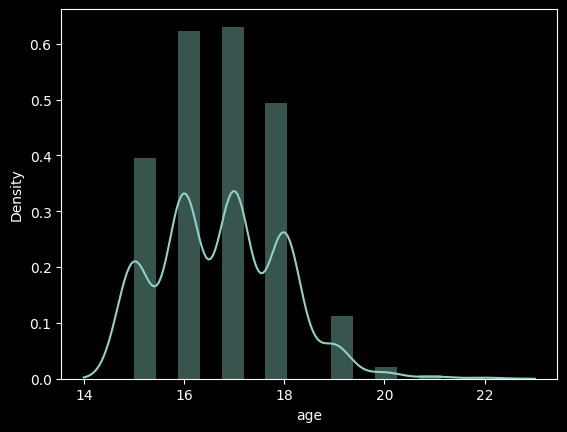

In [12]:
# 나이 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['age'])

In [13]:
# 구간화
import numpy as np
df['age_gp']=np.where(df['age']<=16, '16세 이하',
                      np.where(df['age']<=18, '16-18세', '18세 이상'))
df[['age', 'age_gp']]

,age,age_gp
0,18,16-18세
1,17,16-18세
2,15,16세 이하
3,15,16세 이하
4,16,16세 이하
...,...,...
644,19,18세 이상
645,18,16-18세
646,18,16-18세
647,17,16-18세


In [15]:
# 나이에 따른 최종 성적 비교
df_gp = df.groupby('age_gp')['G3'].agg(['count','mean'])
df_gp

,count,mean
age_gp,,
16-18세,319,12.050157
16세 이하,289,12.038062
18세 이상,41,9.853659


In [16]:
# 가족 구성원 숫자에 따른 최종성적 비교
df.groupby('famsize')['G3'].agg(['count','mean'])

,count,mean
famsize,,
GT3,457,11.811816
LE3,192,12.130208


In [17]:
# 어머니 교육수준에 따른 최종성적 비교
df.groupby('Medu')['G3'].agg(['count','mean'])

,count,mean
Medu,,
0,6,11.666667
1,143,10.797203
2,186,11.661290
3,139,11.920863
4,175,13.068571


In [18]:
# 아버지 교육수준에 따른 최종성적 비교
df.groupby('Fedu')['G3'].agg(['count','mean'])

,count,mean
Fedu,,
0,7,12.142857
1,174,10.936782
2,209,11.784689
3,131,12.381679
4,128,12.921875


In [20]:
# 아버지/어머니 교육수준에 따른 최종성적 비교
df[(df['Medu']==4)&(df['Fedu']==4)]['G3'].agg(['count','mean'])

count    95.000000
mean     13.115789
Name: G3, dtype: float64

In [21]:
# 어머니 직업에 따른 최종성적 비교
df.groupby('Mjob')['G3'].agg(['count','mean'])

,count,mean
Mjob,,
at_home,135,11.044444
health,48,13.062500
other,258,11.670543
services,136,12.147059
teacher,72,13.138889


In [22]:
# 아버지 직업에 따른 최종성적 비교
df.groupby('Fjob')['G3'].agg(['count','mean'])

,count,mean
Fjob,,
at_home,42,11.428571
health,23,12.565217
other,367,11.891008
services,181,11.629834
teacher,36,13.583333


In [24]:
# 아버지/어머니 직업, 교육수준에 따른 최종 섲ㅇ적 비교
df[(df['Fjob']=='teacher')&(df['Mjob']=='teacher')&(df['Medu']==4)&(df['Fedu']==4)]['G3'].agg(['count','mean'])

count    16.000
mean     14.375
Name: G3, dtype: float64

## Session 2
## 저조 성적자 분석

### 성적 분포 확인
---

11.906009244992296


<Axes: xlabel='G3', ylabel='Density'>

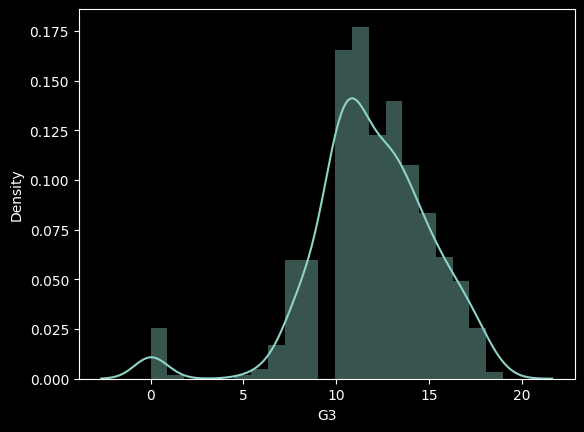

In [25]:
# 10점 이하를 성적 저조자로 선정
print(df['G3'].mean())
sns.distplot(df['G3'])

In [27]:
# 전체 중 15%가 성적 저조자
len(df[df['G3']<10])/len(df)

0.15408320493066255

### 성적 저조자 특성 파악
---

In [29]:
# 라벨 생성
df['flag']=np.where(df['G3']<10, 'low','high')
df['flag'].head(20)

0     high
1     high
2     high
3     high
4     high
5     high
6     high
7     high
8     high
9     high
10    high
11    high
12    high
13    high
14    high
15    high
16    high
17    high
18     low
19    high
Name: flag, dtype: object

In [30]:
# 알콜소비량
df[['Dalc','Walc']].head()

,Dalc,Walc
0,1,1
1,1,1
2,2,3
3,1,1
4,1,2


In [31]:
# 성적이 높은 애들에 비해, 음주량이 높다.
print(df.groupby('flag')['Dalc'].mean())
print('')
print(df.groupby('flag')['Walc'].mean())

flag
high    1.453552
low     1.770000
Name: Dalc, dtype: float64

flag
high    2.216758
low     2.630000
Name: Walc, dtype: float64


In [32]:
# 이동시간이 길다.
df.groupby('flag')['traveltime'].mean()

flag
high    1.550091
low     1.670000
Name: traveltime, dtype: float64

In [34]:
# 도시/시골여부
df.groupby(['flag','address'])['flag'].count()

flag  address
high  R          153
      U          396
low   R           44
      U           56
Name: flag, dtype: int64

In [35]:
# 연애
df.groupby(['flag','romantic'])['flag'].count()

flag  romantic
high  no          356
      yes         193
low   no           54
      yes          46
Name: flag, dtype: int64

In [36]:
# 유료수업
df.groupby(['flag','paid'])['flag'].count()

flag  paid
high  no      519
      yes      30
low   no       91
      yes       9
Name: flag, dtype: int64

In [37]:
# 유료수업
(30/549), (9/100)

(0.0546448087431694, 0.09)

In [38]:
# 음주량 높고, 이동시간 긴, 시골
df[(df['Dalc']>=2) & (df['Walc']>=2)&(df['traveltime']>=2)&(df['address']=='R')].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_gp,flag
69,GP,F,15,R,LE3,T,3,1,other,other,reputation,father,2,4,0,no,yes,no,no,no,yes,yes,no,4,4,2,2,3,3,6,15,15,15,16세 이하,high
108,GP,M,15,R,GT3,T,4,4,other,other,home,father,4,4,0,no,yes,no,yes,yes,yes,yes,yes,1,3,5,3,5,1,8,12,10,11,16세 이하,high
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,0,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,10,11,12,16세 이하,high
140,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,2,10,9,10,16-18세,high
165,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,0,no,yes,yes,yes,yes,yes,yes,yes,4,2,1,2,3,3,2,13,13,13,16세 이하,high


In [39]:
# 음주량 높고, 이동시간 긴, 시골 --> 총 42
len(df[(df['Dalc']>=2) & (df['Walc']>=2)&(df['traveltime']>=2)&(df['address']=='R')])

42

In [41]:
# 음주량 높고, 이동시간 긴, 시골 > 총 42명의 총 평균 점수 10.5점
df[(df['Dalc'] >= 2) & (df['Walc'] >= 2) & (df['traveltime'] >= 2) & (df['address'] == 'R')]['G3'].mean()

10.523809523809524

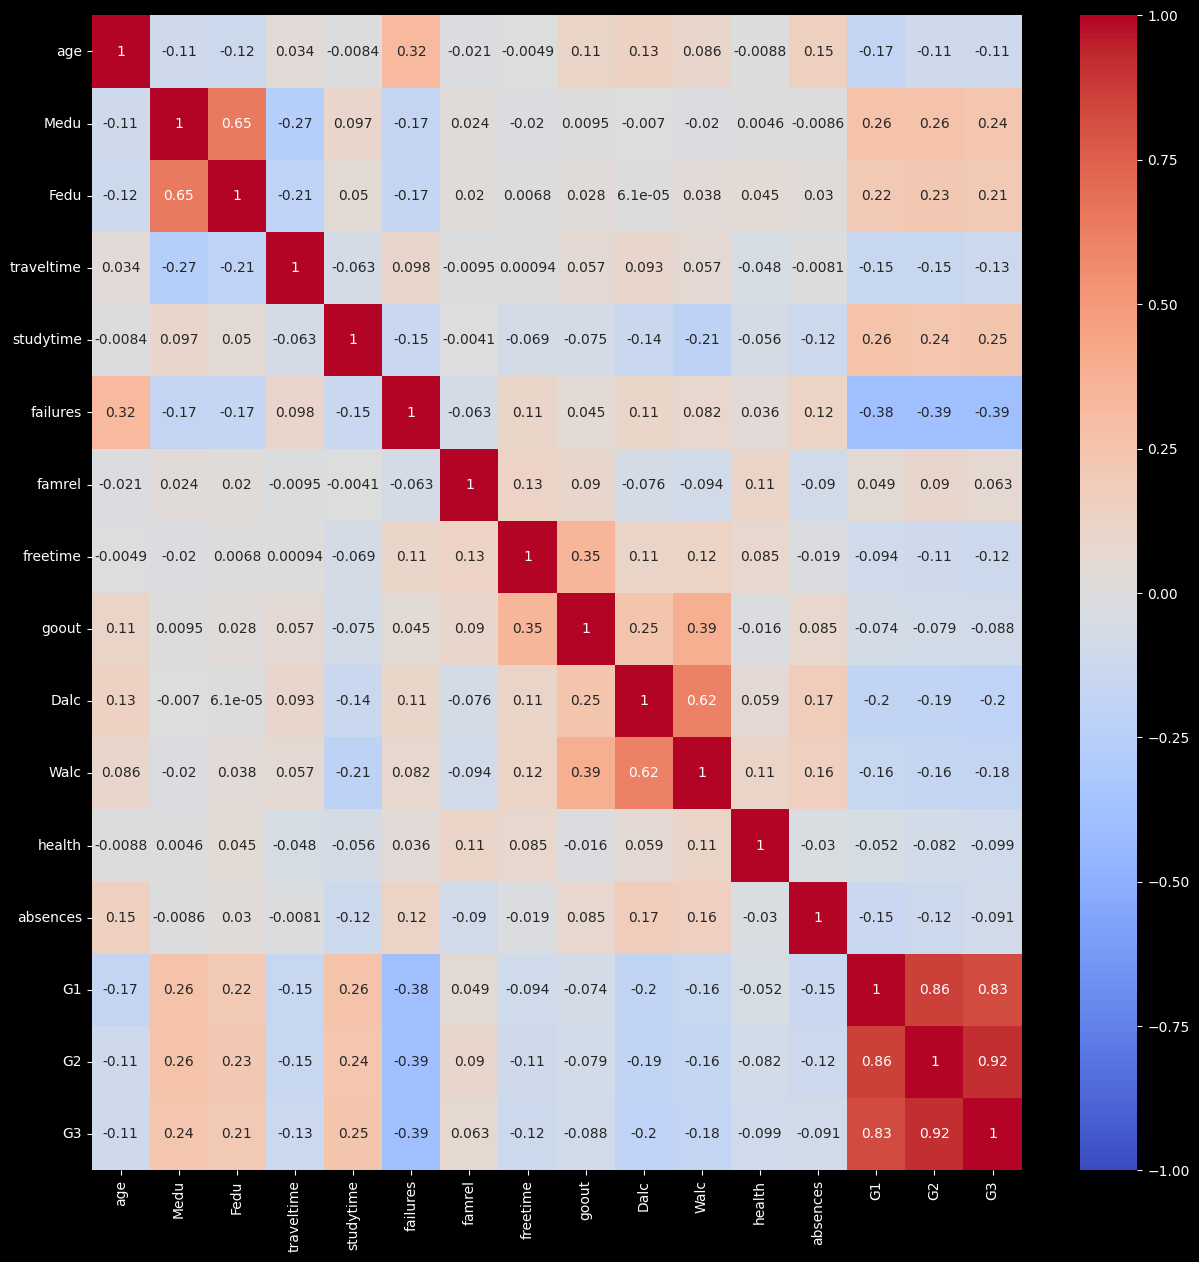

In [48]:
# 숫자 데이터만 포함하는 DataFrame 생성
numeric_df = df.select_dtypes(include=[int, float])


# sns.heatmap을 통한 상관관계 분석
sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(15,15);

## Session 3
## 우수학생 선정 가이드 수립

### 모델링을 위한 데이터 준비
---

In [49]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == object :
    categorical_list.append(i)
  else :
    numeric_list.append(i)

print("categorical_list :", categorical_list)
print("numeric_list :", numeric_list)

categorical_list : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'age_gp', 'flag']
numeric_list : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [50]:
categorical_list.remove('age_gp')
categorical_list.remove('flag')

In [52]:
# 의미없는 변수 삭제시 활성화
del_list = ['address', 'Dalc', 'Medu', 'freetime', 'Fedu', 'Mjob', 'Fjob', 'famrel',
       'sex', 'romantic', 'traveltime', 'schoolsup', 'reason']

for n,i in enumerate(del_list) :
  print(del_list[n], ":",  df[i].dtypes)

address : object
Dalc : int64
Medu : int64
freetime : int64
Fedu : int64
Mjob : object
Fjob : object
famrel : int64
sex : object
romantic : object
traveltime : int64
schoolsup : object
reason : object


In [54]:
# 의미없는 변수 삭제시 활성화
categorical_list.remove('address')
categorical_list.remove('Mjob')
categorical_list.remove('Fjob')
categorical_list.remove('sex')
categorical_list.remove('romantic')
categorical_list.remove('schoolsup')
categorical_list.remove('reason')

In [56]:
# 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


X=df.drop(['age_gp', 'flag', 'G1', 'G2', 'G3'], axis=1)
Y=df['G3']

# 의미없는 변수 삭제시 활성화
X=df.drop(['age_gp', 'flag', 'G1', 'G2', 'G3','address', 'Dalc', 'Medu', 'freetime', 'Fedu', 'Mjob', 'Fjob', 'famrel',
       'sex', 'romantic', 'traveltime', 'schoolsup', 'reason'], axis=1)
Y=df['G3']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123456)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(454, 17)
(454,)
(195, 17)
(195,)


In [57]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

school
famsize
Pstatus
guardian
famsup
paid
activities
nursery
higher
internet


### 모델 학습 및 평가
---

In [59]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=123456)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, random_state=123456)

In [60]:
# 예측
# 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  1.850441803441403
r2_score(r2):  0.34833651206659244

mae_test(mae):  2.2186240505295327
r2_score(r2):  0.3104692187770649


In [61]:
# pd.options.display.float_format = '{:.5f}'.format
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Predicted Values'] - result['Real Values']
result.head(5)

,Real Values,Predicted Values,diff
168,8,12.853694,4.853694
482,9,10.558145,1.558145
207,10,12.190978,2.190978
603,0,12.037500,12.037500
614,12,12.455912,0.455912


In [62]:
# diff 값 음수, 양수 개수 확인
len(result[result['diff']<0]), len(result[result['diff']>0])

(96, 99)

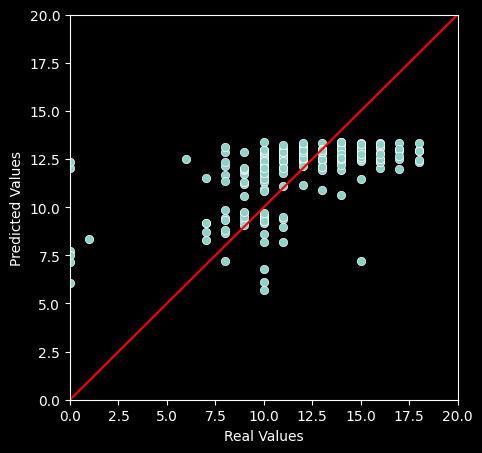

In [65]:
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.xlim(0, 20)
plt.ylim(0, 20)
x = [0, 20]
y = [0, 20]
plt.plot(x, y, color='red')
plt.gcf().set_size_inches(5 ,5)

### 중요 변수 파악
---

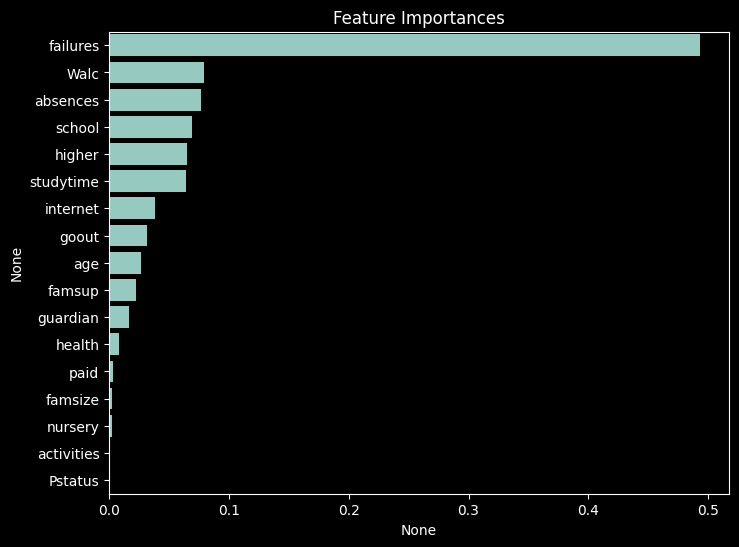

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [68]:
# 중요변수 탐색
df.groupby('failures')['G3'].mean()

failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

### 모델 저장
---

In [69]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)